In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Atten_GRU = pd.read_csv('data/attention24steps_preds_1080.csv')
Atten_GRU

,pred_Encoder_GRU,true
0,-0.701612,-0.151606
1,-0.437652,0.010275
2,-0.411710,0.005033
3,-0.421956,-0.107122
4,0.282107,-0.072980
...,...,...
1075,-0.795916,-0.825077
1076,-0.897191,-0.825077
1077,-0.759636,-0.825077
1078,-0.654527,-0.825077


In [3]:
Atten_GRU_value = Atten_GRU.iloc[:,0].values
Atten_GRU_value

array([-0.7016116 , -0.43765187, -0.41170973, ..., -0.7596362 ,
       -0.6545275 , -0.55302215])

In [4]:
true_value = Atten_GRU.iloc[:,1].values
true_value

array([-0.1516059 ,  0.0102745 ,  0.00503275, ..., -0.8250766 ,
       -0.8250766 , -0.8250766 ])

In [5]:
LSTM = pd.read_csv('data/LSTM24steps_preds1080.csv')
LSTM

,LSTMpred
0,0.805940
1,0.323940
2,1.045225
3,0.808508
4,1.248102
...,...
1075,0.559685
1076,0.551833
1077,0.550516
1078,0.546167


In [6]:
LSTM_value = LSTM.iloc[:,0].values
LSTM_value

array([0.8059399 , 0.32394022, 1.0452253 , ..., 0.5505158 , 0.5461667 ,
       0.4895674 ])

In [7]:
RNN = pd.read_csv('data/RNN24steps_preds1080.csv')
RNN

,RNNpred
0,0.612185
1,0.608585
2,0.269512
3,0.442933
4,0.458097
...,...
1075,0.890825
1076,0.787166
1077,0.911182
1078,0.846414


In [8]:
RNN_value = RNN.iloc[:,0].values
RNN_value

array([0.6121846 , 0.608585  , 0.2695116 , ..., 0.91118157, 0.84641445,
       0.8912538 ])

In [9]:
informer = pd.read_csv('data/informer.csv')
informer

,Prediction
0,-0.268650
1,-0.264229
2,-0.276848
3,-0.235032
4,-0.126430
...,...
1075,0.194611
1076,0.197075
1077,0.196655
1078,0.195333


In [10]:
informer_value = informer.values
informer_value

array([[-0.2686504 ],
       [-0.26422864],
       [-0.27684763],
       ...,
       [ 0.1966545 ],
       [ 0.19533348],
       [ 0.19472879]])

<Figure size 432x288 with 0 Axes>

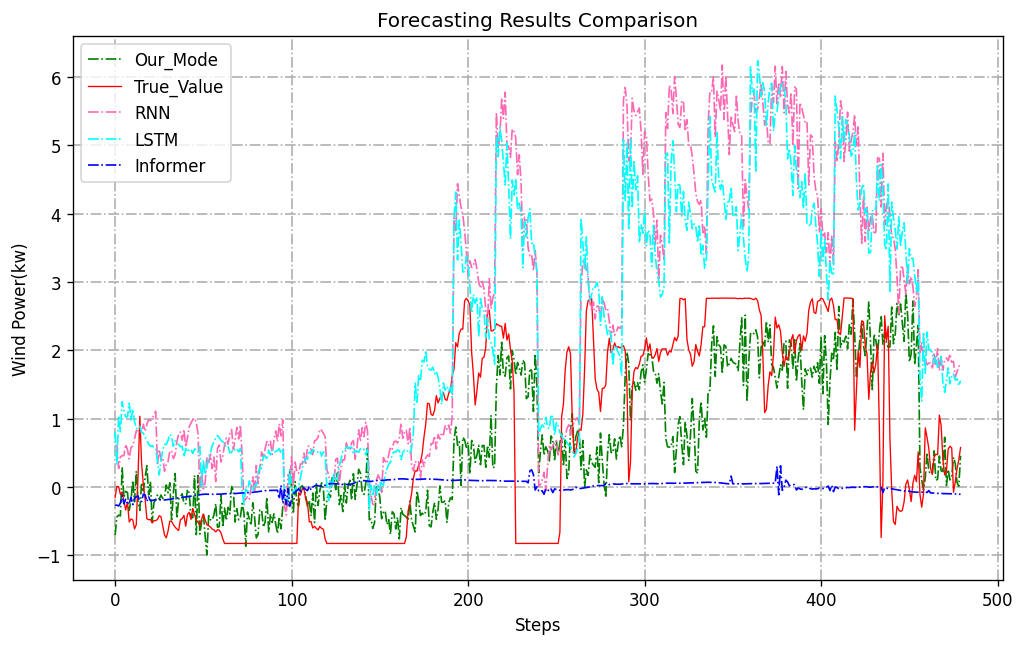

In [11]:
plt.figure(1)
fs = (10,6)
plt.figure(figsize=fs,dpi=120)
xs = np.arange(len(true_value[:480]))

    
plt.title('Forecasting Results Comparison')
plt.xlabel('Steps')
plt.ylabel('Wind Power(kw)')
plt.plot(xs, Atten_GRU_value[:480], '-.g', linewidth = 1.0, label = 'Our_Mode')
plt.plot(xs, true_value[:480], '-r', linewidth = 0.8, label = 'True_Value')

plt.plot(xs, RNN_value[:480], 'hotpink', linestyle='-.',linewidth = 1.0, label = 'RNN')

plt.plot(xs, LSTM_value[:480], color='cyan', linestyle='-.',linewidth = 1.0, label = 'LSTM')
plt.plot(xs, informer_value[:480], color='b', linestyle='-.',linewidth = 1.0, label = 'Informer')

plt.grid(linestyle='-.', linewidth = 1)
plt.legend()
plt.savefig('Save_figure/24steps_comparison.png', dpi=1000)
plt.show()

In [13]:
def mse(pred, gt):
    """
    Desc:
        Mean Square Error
    Args:
        pred:
        gt: ground truth vector
    Returns:
        MSE value
    """
    _mse = 0.
    if len(pred) > 0 and len(gt) > 0:
        _mse = np.mean((pred - gt) ** 2)
    return _mse


def rmse(pred, gt):
    """
    Desc:
        Root Mean Square Error
    Args:
        pred:
        gt: ground truth vector
    Returns:
        RMSE value
    """
    return np.sqrt(mse(pred, gt))

def mape(pred, gt):
    """
    Desc:
        Mean Absolute Percentage Error
    Args:
        pred:
        gt: ground truth vector
    Returns:
        MAPE value
    """
    _mape = 0.
    if len(pred) > 0 and len(gt) > 0:
        _mape = np.mean(np.abs((pred - gt) / gt))
    return _mape

def mspe(pred, gt):
    """
    Desc:
        Mean Square Percentage Error
    Args:
        pred:
        gt: ground truth vector
    Returns:
        MSPE value
    """
    return np.mean(np.square((pred - gt) / gt)) if len(pred) > 0 and len(gt) > 0 else 0


In [14]:
mape_attGRU = mape(Atten_GRU_value[:480], true_value[:480])
mape_attGRU

1.8590062472328062

In [15]:
rmse_attGRU = rmse(Atten_GRU_value[:480], true_value[:480])
rmse_attGRU

1.091879283587591

In [16]:
mape_RNN_value = mape(RNN_value[:480], true_value[:480])
mape_RNN_value

3.3463892395996666

In [17]:
rmse_RNN_value = rmse(RNN_value[:480], true_value[:480])
rmse_RNN_value

2.155792102495713

In [18]:
mape_LSTM_value = mape(LSTM_value[:480], true_value[:480])
mape_LSTM_value

3.6219147734159853

In [19]:
rmse_LSTM_value = rmse(LSTM_value[:480], true_value[:480])
rmse_LSTM_value

1.936673228796185

In [20]:
mape_informer_value = mape(informer_value[:480], true_value[:480])
mape_informer_value

1.0661659192023523

In [21]:
rmse_informer_value = rmse(informer_value[:480], true_value[:480])
rmse_informer_value

1.5790521635351666